# Six assumptions of linear regression

A1. $\epsilon_1$, $\epsilon_2$, ..., $\epsilon_n$ have zero mean.

A2. $\epsilon_1$, $\epsilon_2$, ..., $\epsilon_n$ are normally distributed.

A3. $\epsilon_1$, $\epsilon_2$, ..., $\epsilon_n$ are indepedent.

A4. $\epsilon_1$, $\epsilon_2$, ..., $\epsilon_n$ have a common unknown variance $\sigma^2$.

A5. There is no linear relationship among the explanatory variables, i.e., there is no multicollinearity

A6.  Linearity: The true relationship between the mean of the response variable

<center>
E[Y]= $\beta_0$ + $\beta_1 x_1$  + $\beta_2 x_2$ + ... +  + $\beta_k x_k$
</center>
    
and the explanatory variables $x_1$, $x_1$, ... , $x_k$ is linear.

# Part I. Assumptions Tests

First, take a look at the dataset.

In [165]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv('hprice.txt', sep='\t')
df = df[['Y', 'X1', 'X2', 'X3', 'X4']]
patsy_formula = 'y ~ x1 + x2 + x3 + x4'
data = pd.DataFrame({'x1': df['X1'], 'x2': df['X2'], 'x3': df['X3'], 'x4': df['X4'], 'y': df['Y']})
model = smf.ols(formula = patsy_formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           1.18e-88
Time:                        20:57:01   Log-Likelihood:                -6130.0
No. Observations:                 546   AIC:                         1.227e+04
Df Residuals:                     541   BIC:                         1.229e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4009.5500   3603.109     -1.113      0.266   -1.11e+04    3068.248
x1             5.4292      0.369     14.703      0.000       4.704       6.155
x2          2824.6138   1214.808      2.325      0.020     438.296    5210.932
x3          1.711e+04   1734.434      9.862      0.000    1.37e+04    2.05e+04
x4          7634.8970   1007.974      7.574      0.000    5654.874    9614.920
==============================================================================
Omnibus:                       94.915   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.320
Skew:                           0.893   Prob(JB):                     3.57e-51
Kurtosis:                       5.650   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Student's T-test (Checking A1: Zero Mean)

In [166]:
import scipy as sp

confidence_level = 0.95
significance_level = 1 - confidence_level
population_mean = 0
stat, p_value = sp.stats.ttest_1samp(a=extresid, popmean=population_mean)
print(f'p == {p_value:.6f}', end='')
if p > significance_level:
    print(f' (p > {significance_level:.2f}), sample mean equal to {population_mean} (fail to reject H0)')
else:
    print(f' (P <= {significance_level:.2f}), sample mean does NOT equal to {population_mean} (reject H0)')   

p == 0.992227 (P <= 0.05), sample mean does NOT equal to 0 (reject H0)


## Q-Q Plot (Checking A2: Normally Distributed)

If the data is normally distributed, the points in the QQ-normal plot lie on a straight diagonal line. However, more often than not, many cases are not that clear-cut just like the following one.

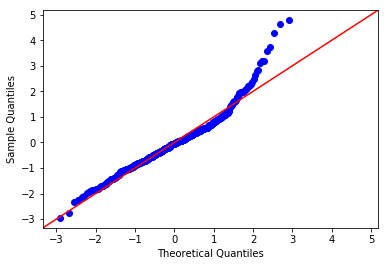

In [167]:
import statsmodels.api as sm
    
sm.qqplot(extresid, line='45')
plt.show()

## Normality Tests (Checking A2: Normally Distributed)

#### Shapiro–Wilk test

In [168]:
from scipy.stats import shapiro

assert len(extresid) >= 3 and len(extresid) <= 5000
assert np.isnan(extresid).any() == False
'''
WARNING: According to page 228 of lecture-2-3_Ch1_MFIT5003_Fall2020-21_with_MJD.pdf,
the allowed dataset length for Shapiro-Wilk test is [3, 5000]
'''
confidence_level = 0.95
significance_level = 1 - confidence_level
stat, p_value = shapiro(extresid)
print(f'p == {p_value:.6f}', end='')
if p > significance_level:
    print(f' (p > {significance_level:.2f}), sample looks Gaussian (fail to reject H0)')
else:
    print(f' (P <= {significance_level:.2f}), sample does NOT look Gaussian (reject H0)')    

p == 0.000000 (P <= 0.05), sample does NOT look Gaussian (reject H0)


 #### Kolmogorov-Smirnov test (KS test)

In [169]:
from scipy.stats import kstest

extresid = (extresid - np.mean(extresid))/np.std(extresid)
# dataset will be STANDARDIZED before conducting kstest.'

confidence_level = 0.95
significance_level = 1 - confidence_level
stat, p_value = kstest(extresid, cdf = 'norm')
print(f'p == {p_value:.6f}', end='')
if p > significance_level:
    print(f' (p > {significance_level:.2f}), sample looks Gaussian (fail to reject H0)')
else:
    print(f' (P <= {significance_level:.2f}), sample does NOT look Gaussian (reject H0)') 

p == 0.002132 (P <= 0.05), sample does NOT look Gaussian (reject H0)


## Scatter Plot (Checking A3: Independent)

We tested normality above and no autocorrelation + normality means independence. If you observe no patterns then it is likely that the no-autocorelation assumption is met then we draw the conclusion that error terms are independent.

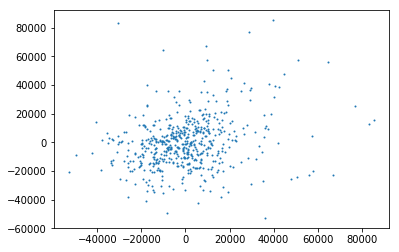

In [170]:
et = model.resid
et_1 = et.shift(1)

plt.scatter(et_1[1:], et[1:], s = 1)
plt.show()

## Durbin–Watson statistic (Checking A3: Independent)

The Durbin–Watson statistic is a test statistic used to detect the presence of autocorrelation at lag 1 in the residuals (prediction errors) from a regression analysis:

DW $\approx$ 0: we can say that there is a strongly positive autocorrelation;

DW $\approx$ 2: we can say that there is no autocorrelation ;

DW $\approx$ 4: we can say that there is a strongly negative autocorrelation.

In [171]:
dw = np.sum(np.diff(model.resid.values) ** 2.0) / model.ssr
print(f'Durbin-Watson statistic: {dw:.5f}', end = '')
if dw == 4:
    print(', implying a PERFECT NEGATIVE autocorrelation!')
elif dw < 4 and dw > 2:
    print(', implying a negative autocorrelation')
elif dw == 2:
    print(', implying NO autocorrelation AT ALL!')
elif dw > 0 and dw < 2:
    print(', implying a positive autocorrelation')
elif dw == 0:
    print(', implying a PERFECT POSITIVE autocorrelation')
else:
    print(', This is IMPOSSIBLE!!!')

Durbin-Watson statistic: 1.48294, implying a positive autocorrelation


## Externally Studentized Residual Plots (Checking A1 to A4 and A6)

1. If you observe pattern (a), i.e., there is no noticeable pattern, the points are around zero and most of them are inside the band |$r_i$| ≤ 2, then we can say that A1 to A4 are likely met;
2. If you observe pattern (b), it means that the variance of error increases when $\hat{y}$ increase; 
3. If you observe pattern (c), it means that the variance of error decreases when $\hat{y}$ increase;
4. If you observe pattern (d), it means that the variance is relatively small for smaller and larger values of $\hat{y}$, but relatively large for the moderate values of $\hat{y}$.
5. If you observe patterns (e) or (f), it suggest that the regression model may be nonlinear or we may miss one or more significant terms.

<img src="esr.png" alt="externally-studentized-residual-plot" style="width: 300px;"/>

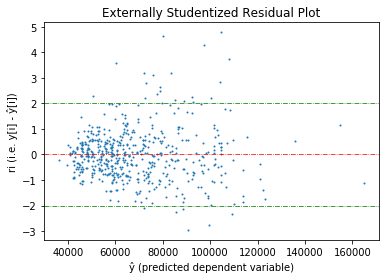

In [172]:
import matplotlib.pyplot as plt
extresid = model.get_influence().resid_studentized_external
pred = model.predict()

plt.scatter(pred, extresid, s = 1)
plt.xlabel('ŷ (predicted dependent variable)')
plt.ylabel('ri (i.e. y[i] - ŷ[i])')
plt.axhline(y=2, color='g', linestyle='-.', linewidth = 0.75)
plt.axhline(y=0, color='r', linestyle='-.', linewidth = 0.75)
plt.axhline(y=-2, color='g', linestyle='-.', linewidth = 0.75)
plt.title('Externally Studentized Residual Plot')
plt.show()

## T-Test for sample mean (Checking A1: Zero Mean)

## Pearson's correlation coefficient (Checking A5: Multicollinearity)

Pearson's correlation matrix could help. However, among all explanatory variables it ONLY shows the association between any two variables, ignoring other explanatory variables. However, the multicollinearity involves associations among all explanatory variables.

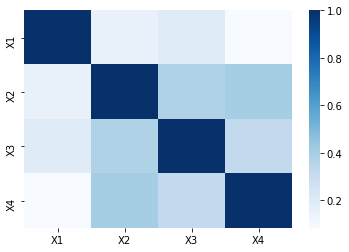

In [173]:
corr = df[['X1', 'X2', 'X3', 'X4']].corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Blues)

## Variance Inflation Factor (Checking A5: Multicollinearity)

Compared with correlation coefficient, VIF is a more proper way to detect multicollinearity. It provides an index that measures how much the variance of an estimated regression coefficient is increased because of collinearity.

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['X1', 'X2', 'X3', 'X4']]

for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f'[{X.columns[i]}] vif == {vif:.5f}: ', end = '')
    if vif > 10:
        print('multicollinearity is SERIOUS')
    else:
        print('multicollinearity is NOT that serious')

[X1] vif == 6.08784: multicollinearity is NOT that serious
[X2] vif == 13.67569: multicollinearity is SERIOUS
[X3] vif == 9.08706: multicollinearity is NOT that serious
[X4] vif == 6.66200: multicollinearity is NOT that serious


## Component-Component Plus Residual Plot (Checking A6: Linear)

If the partial residual plot for $X_j$ shows a straight line, it is an indication that the true relationship between the response variable Y and $X_j$ is straight-line, when all other variables are taken into account. If the plot shows a non-linear relationship , it is an indication that $X_j$ (partially) affects $y$ in a non-linear fashion.

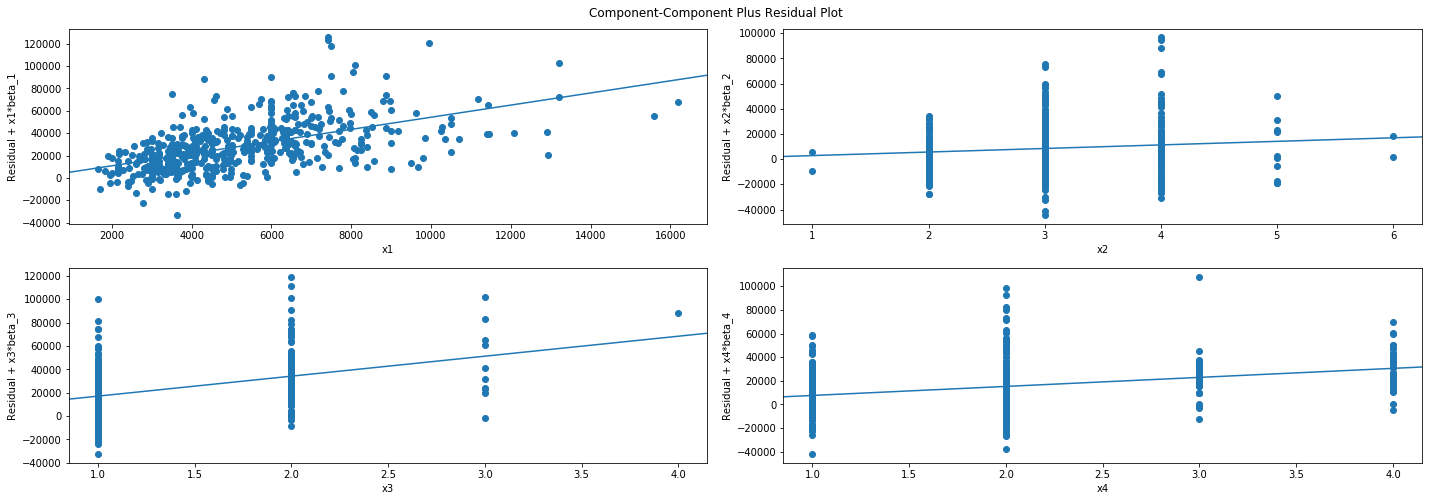

In [175]:
fig1 = plt.figure(figsize=(20, 10))
sm.graphics.plot_ccpr_grid(model, fig=fig1)
plt.show()

# Part II. Remedies

This part is still under developing...I will push the latest version when it is done.
Thanks!